In [ ]:
!pip3 install ColabTurtle

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ColabTurtle.Turtle as tim 
import time
from scipy.stats import ttest_1samp
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.linear_model import LinearRegression

In [3]:
path = "/content/drive/MyDrive/ProbDataset.csv"

In [4]:
 tim.initializeTurtle(initial_speed=5)
 string1 = 'DATA  '
 string2 = 'ANALYSIS  '
 string3 = 'ON  '
 string4 = 'EUROPEAN  '
 string5 = 'COUNTRIES'
 tim.clear()
 tim.hideturtle()
 tim.penup()
 tim.bgcolor('pink')
 tim.color('red')
 tim.setposition(125,150)
 tim.write(string1 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(320,150)
 time.sleep(0.1)
 tim.write(string2 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(650,150)
 time.sleep(0.1)
 tim.write(string3 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(250,250)
 time.sleep(0.1)
 tim.write(string4 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(250,350)
 time.sleep(0.1)
 tim.write(string5 , font=(60 , 'Calibiri' , 'bold'))
 tim.color('green')
 tim.pensize(10)
 tim.setposition(80,390)
 tim.pendown()
 tim.forward(320)
 tim.showturtle()
 tim.right(90)
 time.sleep(0.1)
 tim.forward(680)
 tim.right(90)
 time.sleep(0.1)
 tim.forward(320)
 time.sleep(0.1)
 tim.right(90)
 tim.forward(680)
 tim.hideturtle()

In [5]:
df=pd.read_csv(path , nrows=61)
res= df[df['WHO Region'] == 'Europe']

In [ ]:
x=res['Country/Region']
y=res['Confirmed']
res.loc[21, 'Country/Region'] = 'Bosnia'

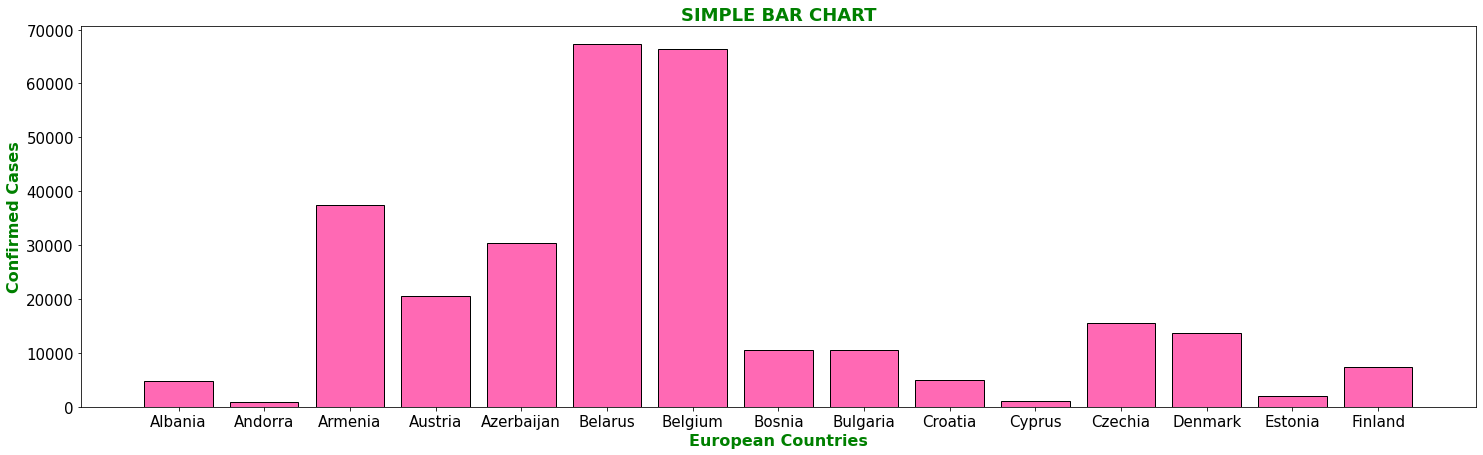

In [7]:
plt.figure(figsize=(25,7))
plt.rc('xtick', labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.bar(x,y,width=[0.8],color=['hotpink'],edgecolor='black')
plt.xlabel("European Countries" , fontweight='bold' ,fontsize=16 , color='green')
plt.ylabel("Confirmed Cases" , fontweight='bold' , fontsize=16 , color='green')
plt.title("SIMPLE BAR CHART" , fontsize=18, color='green' , fontweight='bold')
plt.show()

In [8]:
Active = res['Active']
Death = res['Deaths']
Recovered = res['Recovered']
R_recovered = list(np.add(Active,Death))

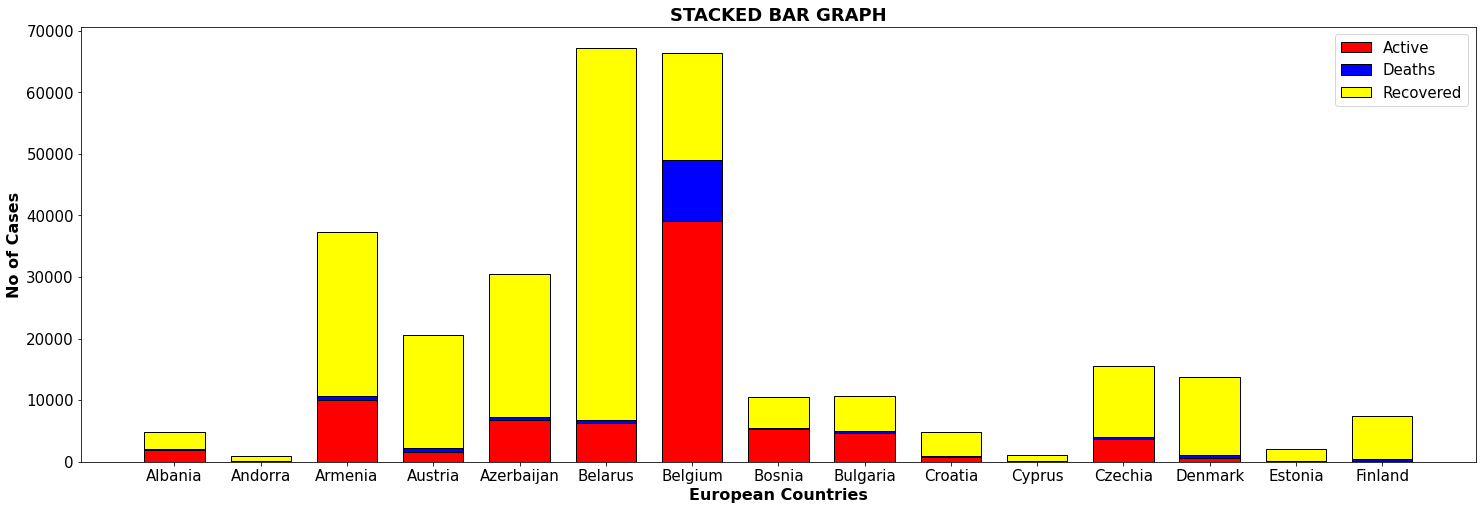

In [9]:
plt.figure(figsize=(25,8))
plt.rc('xtick' , labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.bar(x,Active,width=0.7,label="Active" , edgecolor='black' , color='red')
plt.bar(x,Death,width=0.7,bottom=Active,label="Deaths" , edgecolor='black' , color='blue')
plt.bar(x,Recovered,width=0.7,bottom=R_recovered,label="Recovered" , edgecolor='black' , color='yellow')
plt.xlabel("European Countries" , fontweight='bold' , fontsize=16)
plt.ylabel("No of Cases" , fontweight='bold' , fontsize=16)
plt.title("STACKED BAR GRAPH" , fontweight='bold' , fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [10]:
w=0.3
Ncases = res['New cases']
Ndeaths = res['New deaths']
Nrecovered = res['New recovered']
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i-w for i in bar1]

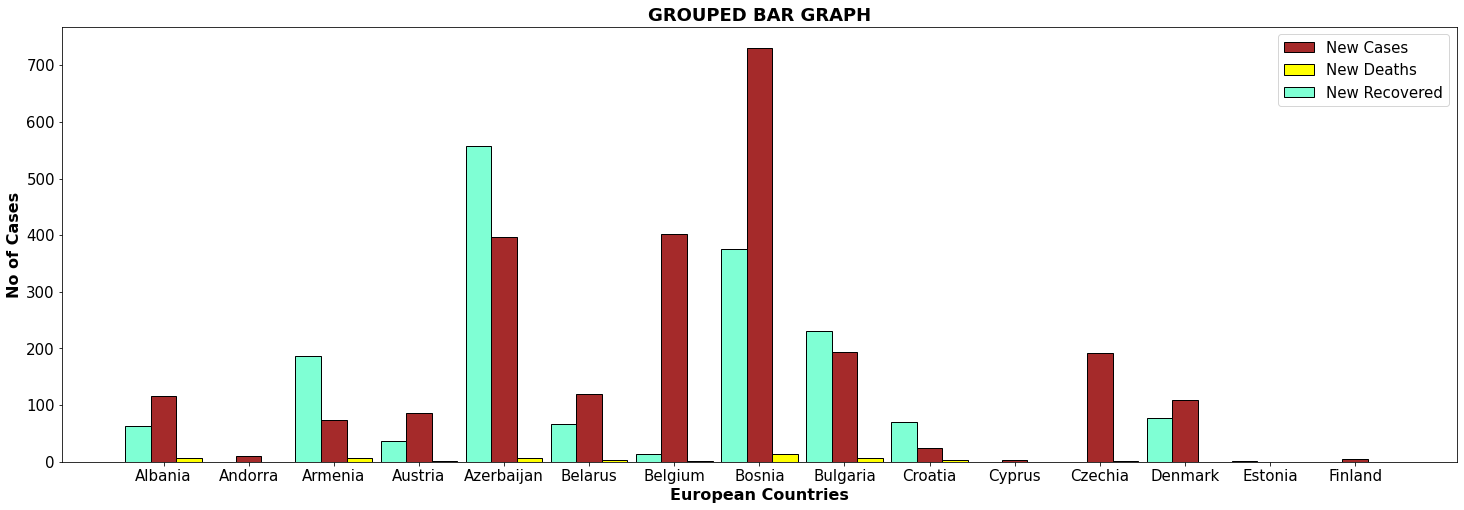

In [11]:
plt.figure(figsize=(25,8))
plt.rc('xtick' , labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.xticks(bar1,x)
plt.bar(bar1,Ncases,0.3,label="New Cases" , edgecolor='black' , color='brown')
plt.bar(bar2,Ndeaths,0.3,label="New Deaths" , edgecolor='black' , color='yellow')
plt.bar(bar3,Nrecovered,0.3,label="New Recovered" , edgecolor='black' , color='aquamarine')
plt.xlabel("European Countries" , fontweight='bold' , fontsize=16)
plt.ylabel("No of Cases" , fontweight='bold' , fontsize=16)
plt.title("GROUPED BAR GRAPH" , fontweight='bold' , fontsize=18)
plt.legend(fontsize=15)
plt.show()

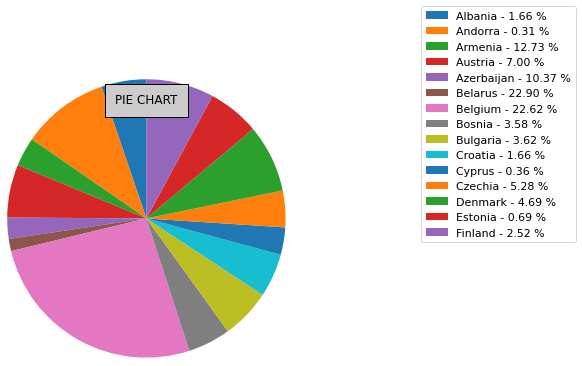

In [12]:
DeathPerCase = res['Deaths / 100 Cases']
porcent = 100.*y/y.sum()
patches, texts = plt.pie(DeathPerCase, startangle=90, radius=1.6 )
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = False
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, DeathPerCase), key=lambda x: x[2], reverse=True))
plt.legend(patches, labels ,bbox_to_anchor=(2.5,1.5), fontsize=11)
plt.savefig('piechart.png', bbox_inches='tight')   
plt.title("PIE CHART" , bbox={'facecolor':'0.8' , 'pad':10} ,)
plt.show()

In [13]:
def dotplots(x):
 data = np.array(x)
 values, counts = np.unique(data, return_counts=True)

# Draw dot plot with appropriate figure size, marker size and y-axis limits
 fig, ax = plt.subplots(figsize=(23,8))
 for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'co', ms=12, linestyle='')
 for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
 ax.yaxis.set_visible(False)
 ax.set_ylim(-1, max(counts))
 ax.set_xticks(range(min(values), max(values)+1))
 ax.tick_params(axis='x', length=0, pad=8, labelsize=12)
 return plt.show()

                                                   Albania  =   5     (Death /100 Recovered) 
                                                   Andorra  =   6     (Death /100 Recovered) 
                                                   Armenia  =   2     (Death /100 Recovered) 
                                                   Austria  =   3     (Death /100 Recovered) 
                                                   Azerbaijan  =   1     (Death /100 Recovered) 
                                                   Belarus  =   0     (Death /100 Recovered) 
                                                   Belgium  =   56     (Death /100 Recovered) 
                                                   Bosnia  =   5     (Death /100 Recovered) 
                                                   Bulgaria  =   6     (Death /100 Recovered) 
                                                   Croatia  =   3     (Death /100 Recovered) 
                                                   Cypru

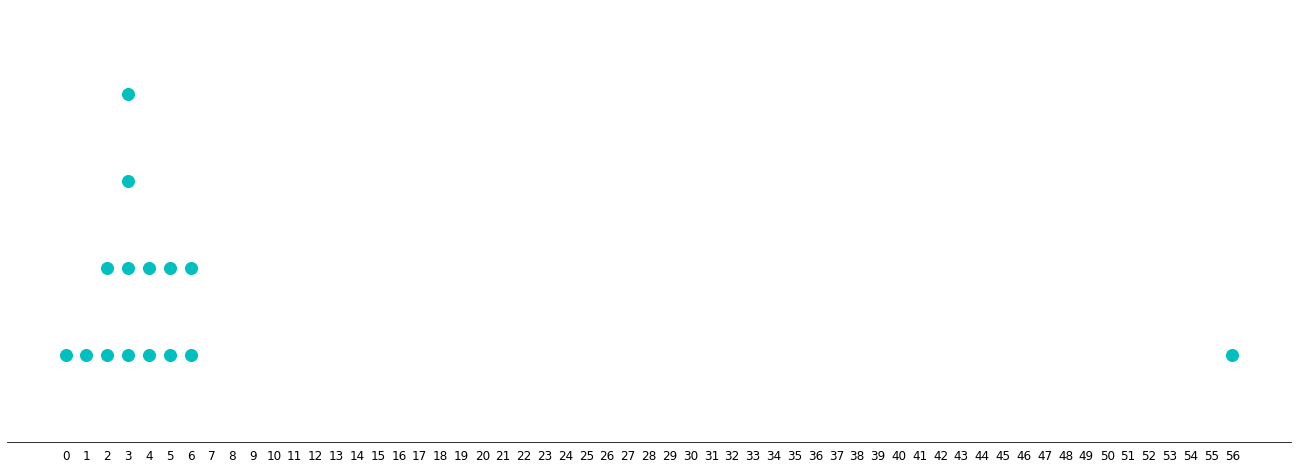

In [14]:
DPR = res['Deaths / 100 Recovered']
res1 = DPR.astype(int)
for x, y in zip(x, res1):
  print('\033[1m'"                                                  ",x," =  ",y, "    (Death /100 Recovered) "'\033[0m')
dotplots(res1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


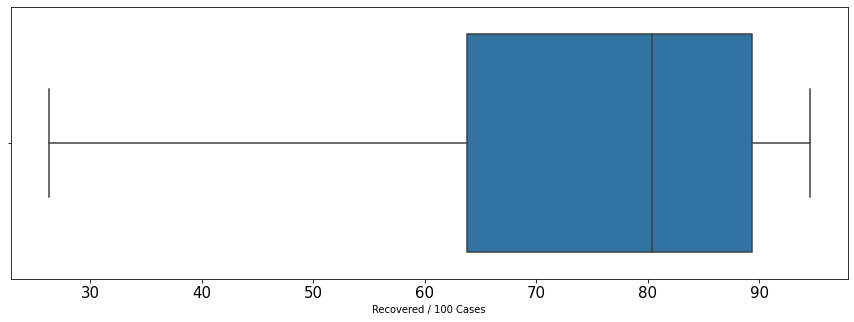

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(res['Recovered / 100 Cases'])

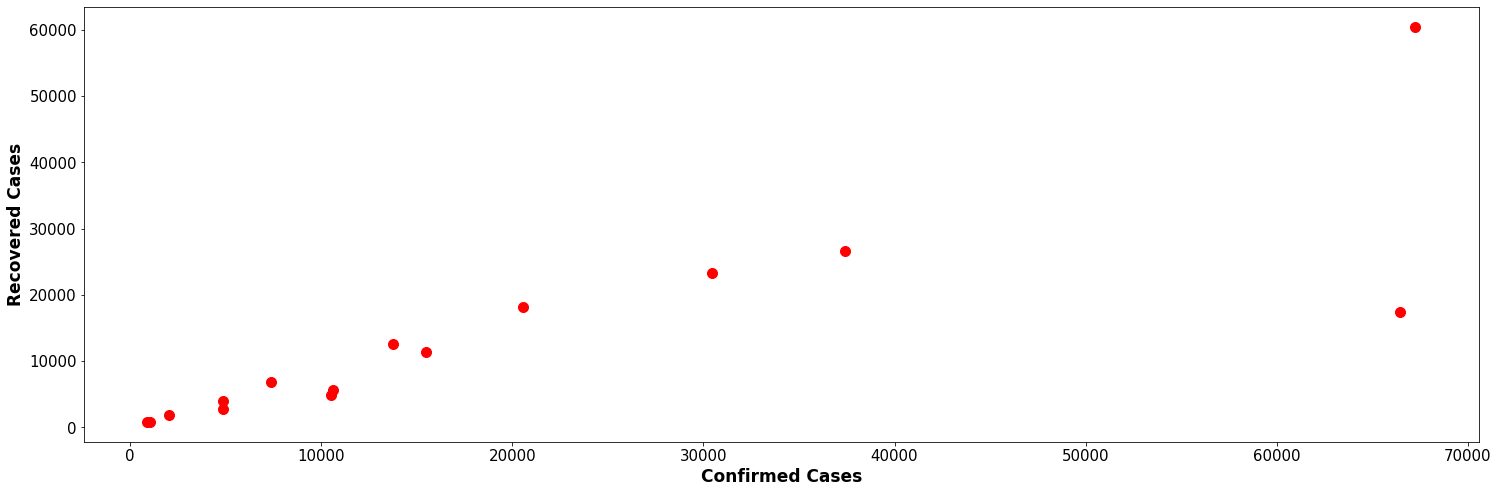

In [16]:
fig, ax = plt.subplots(figsize=(25,8))
plt.scatter(res['Confirmed'],res['Recovered'] , s=100 , color='red')
plt.xlabel("Confirmed Cases", fontweight='bold', fontsize=17)
plt.ylabel("Recovered Cases", fontweight='bold', fontsize=17)
plt.show()

#                   **HYPOTHETICAL TESTING**

#   **(1) ONE SAMPLE T-TEST ON CONFIRMED CASES OF EUROPEAN COUNTRIES**

In [80]:
df=pd.read_csv(path , nrows=100)
res= df[df['WHO Region'] == 'Europe']
confirmed=res['Confirmed']
sample_size=10
confirmed_sample=np.random.choice(confirmed,sample_size)
ttest,p_value=ttest_1samp(confirmed_sample,np.mean(confirmed))
if p_value < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


# **(2) ONE SAMPLE Z-TEST ON CONFIRMED CASES OF EUROPEAN COUNTRIES**

In [ ]:
df=pd.read_csv(path , nrows=186)
res= df[df['WHO Region'] == 'Europe']
confirmed=res['Confirmed']
sample_size=35
confirmed_sample=np.random.choice(confirmed,sample_size)
mean=np.mean(confirmed)
ztest , pvalue=stests.ztest(confirmed_sample,value=mean)
if pvalue < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

# **(3)ONE SAMPLE F-TEST ON CONFIRMED CASES OF EUROPEAN COUNTRIES**

In [ ]:
import scipy
x=res['Deaths']
y=res['New deaths']
f = np.var(x, ddof=1)/np.var(y, ddof=1)
dfn = x.size-1
dfd = y.size-1.2
p = 1-scipy.stats.f.cdf(f, dfn, dfd)
if pvalue < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

# **(4)LINEAR REGRESSION B/W CONFIRMED AND RECOVERED CASES**

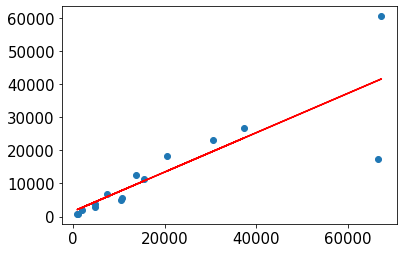

In [104]:
df=pd.read_csv(path , nrows=61)
res= df[df['WHO Region'] == 'Europe']
x=res['Confirmed']
y=res['Recovered']
linreg = LinearRegression()
x = x.values.reshape(-1, 1)
linreg.fit(x, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
y_pred = linreg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

# **(5) CORRELATION**

In [105]:
res.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.640521,0.840289,0.741350,0.290249,0.066741,0.108093,0.349958,-0.319770,0.524869,0.999361,0.587872,-0.222747
Deaths,0.640521,1.000000,0.135345,0.962882,0.335375,-0.151561,-0.143769,0.911168,-0.648445,0.985357,0.638408,0.415102,-0.161215
Recovered,0.840289,0.135345,1.000000,0.260060,0.072554,0.090041,0.150856,-0.157752,0.114690,-0.004865,0.845164,0.371494,-0.265204
Active,0.741350,0.962882,0.260060,1.000000,0.448113,0.044558,0.038762,0.800334,-0.730934,0.930155,0.732764,0.619447,-0.037356
New cases,0.290249,0.335375,0.072554,0.448113,1.000000,0.743595,0.673187,0.201848,-0.685603,0.340550,0.266040,0.714436,0.615500
New deaths,0.066741,-0.151561,0.090041,0.044558,0.743595,1.000000,0.737740,-0.294884,-0.532356,-0.141320,0.040605,0.629880,0.865935
New recovered,0.108093,-0.143769,0.150856,0.038762,0.673187,0.737740,1.000000,-0.299712,-0.276916,-0.172907,0.080520,0.686115,0.548186
Deaths / 100 Cases,0.349958,0.911168,-0.157752,0.800334,0.201848,-0.294884,-0.299712,1.000000,-0.535715,0.953599,0.352359,0.146310,-0.200653
Recovered / 100 Cases,-0.319770,-0.648445,0.114690,-0.730934,-0.685603,-0.532356,-0.276916,-0.535715,1.000000,-0.685860,-0.298286,-0.669673,-0.607687
Deaths / 100 Recovered,0.524869,0.985357,-0.004865,0.930155,0.340550,-0.141320,-0.172907,0.953599,-0.685860,1.000000,0.522742,0.349108,-0.100327


In [17]:
 tim.initializeTurtle(initial_speed=5)
 string1 = 'DATA  '
 string2 = 'ANALYSIS  '
 string3 = 'ON  '
 string4 = 'AFRICAN  '
 string5 = 'COUNTRIES'
 tim.clear()
 tim.hideturtle()
 tim.penup()
 tim.bgcolor('aliceblue')
 tim.color('black')
 tim.setposition(125,150)
 tim.write(string1 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(320,150)
 time.sleep(0.1)
 tim.write(string2 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(650,150)
 time.sleep(0.1)
 tim.write(string3 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(250,250)
 time.sleep(0.1)
 tim.write(string4 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(250,350)
 time.sleep(0.1)
 tim.write(string5 , font=(60 , 'Calibiri' , 'bold'))
 tim.color('black')
 tim.pensize(4)
 tim.setposition(80,390)
 tim.pendown()
 tim.forward(320)
 tim.showturtle()
 tim.right(90)
 time.sleep(0.1)
 tim.forward(680)
 tim.right(90)
 time.sleep(0.1)
 tim.forward(320)
 time.sleep(0.1)
 tim.right(90)
 tim.forward(680)
 tim.hideturtle()

In [18]:
df=pd.read_csv(path , nrows=55)
res= df[df['WHO Region'] == 'Africa']

In [19]:
x=res['Country/Region']
y=res['Confirmed']
res.loc[26, 'Country/Region'] = 'Burkina'
res.loc[33, 'Country/Region'] = 'CAR'
res.loc[39, 'Country/Region'] = 'Brazzaville'
res.loc[40, 'Country/Region'] = 'Kinshasa'
res.loc[54, 'Country/Region'] = 'Guinea'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


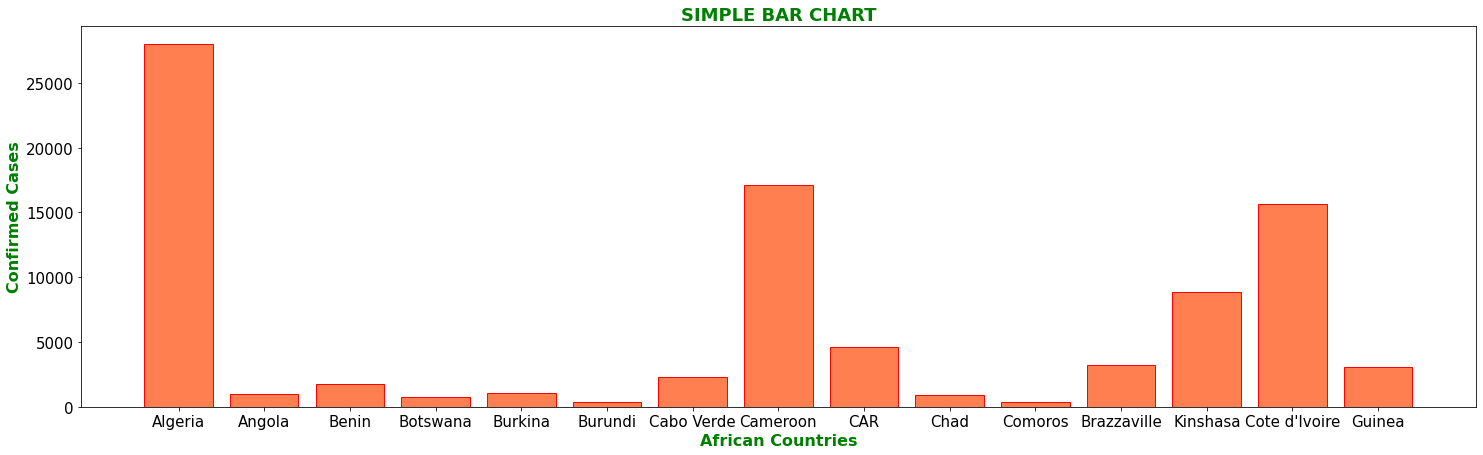

In [20]:
plt.figure(figsize=(25,7))
plt.rc('xtick', labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.bar(x,y,width=[0.8],color=['coral'],edgecolor='red')
plt.xlabel("African Countries" , fontweight='bold' ,fontsize=16 , color='green')
plt.ylabel("Confirmed Cases" , fontweight='bold' , fontsize=16 , color='green')
plt.title("SIMPLE BAR CHART" , fontsize=18, color='green' , fontweight='bold')
plt.show()

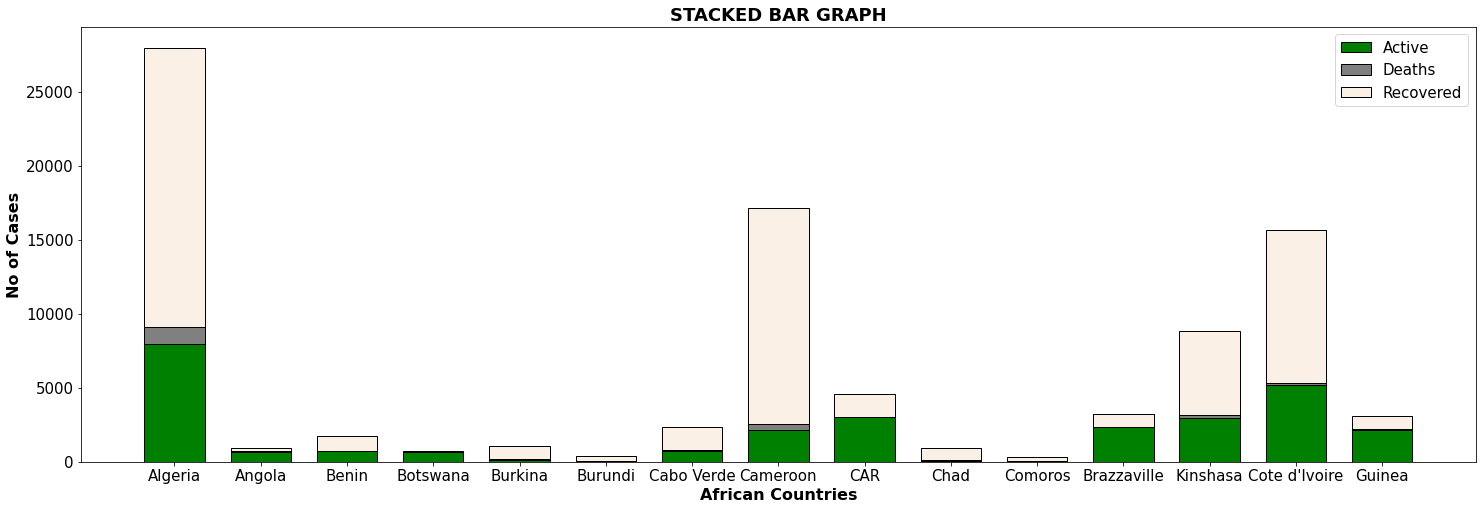

In [21]:
Active = res['Active']
Death = res['Deaths']
Recovered = res['Recovered']
R_recovered = list(np.add(Active,Death))
plt.figure(figsize=(25,8))
plt.rc('xtick' , labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.bar(x,Active,width=0.7,label="Active" , edgecolor='black' , color='green')
plt.bar(x,Death,width=0.7,bottom=Active,label="Deaths" , edgecolor='black' , color='gray')
plt.bar(x,Recovered,width=0.7,bottom=R_recovered,label="Recovered" , edgecolor='black' , color='linen')
plt.xlabel("African Countries" , fontweight='bold' , fontsize=16)
plt.ylabel("No of Cases" , fontweight='bold' , fontsize=16)
plt.title("STACKED BAR GRAPH" , fontweight='bold' , fontsize=18)
plt.legend(fontsize=15)
plt.show()

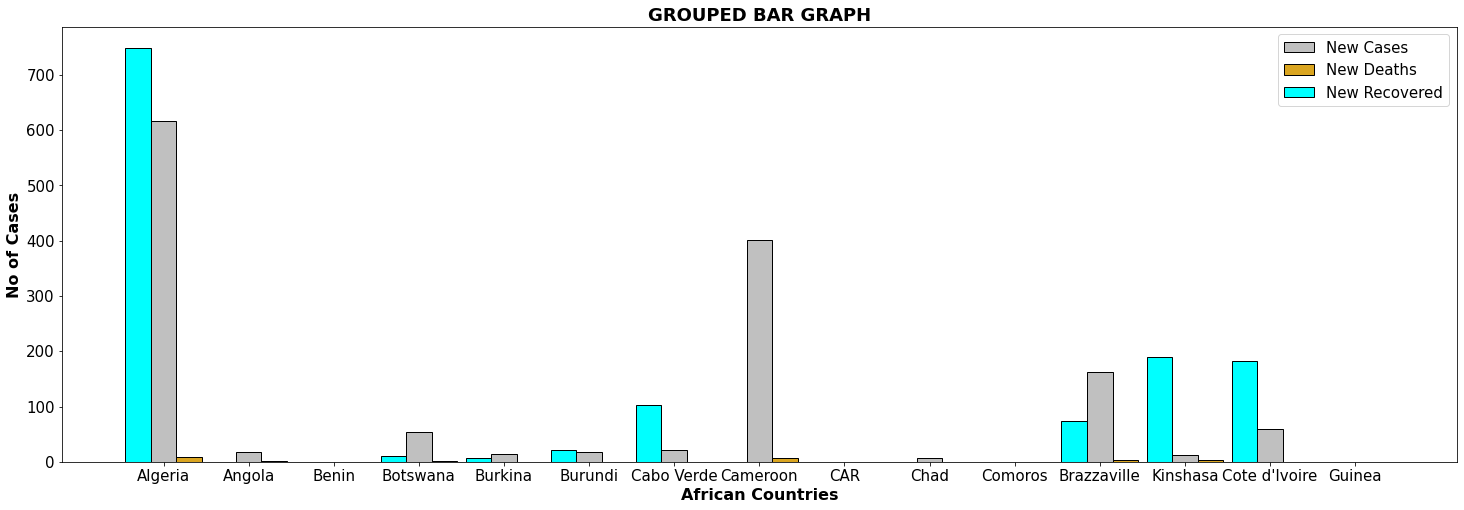

In [22]:
w=0.3
Ncases = res['New cases']
Ndeaths = res['New deaths']
Nrecovered = res['New recovered']
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i-w for i in bar1]
plt.figure(figsize=(25,8))
plt.rc('xtick' , labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.xticks(bar1,x)
plt.bar(bar1,Ncases,0.3,label="New Cases" , edgecolor='black' , color='silver')
plt.bar(bar2,Ndeaths,0.3,label="New Deaths" , edgecolor='black' , color='goldenrod')
plt.bar(bar3,Nrecovered,0.3,label="New Recovered" , edgecolor='black' , color='cyan')
plt.xlabel("African Countries" , fontweight='bold' , fontsize=16)
plt.ylabel("No of Cases" , fontweight='bold' , fontsize=16)
plt.title("GROUPED BAR GRAPH" , fontweight='bold' , fontsize=18)
plt.legend(fontsize=15)
plt.show()

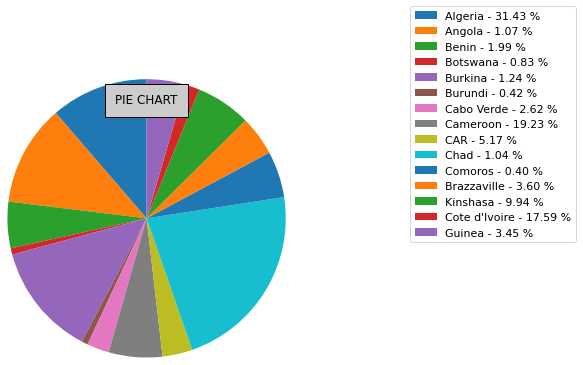

In [23]:
DeathPerCase = res['Deaths / 100 Cases']
porcent = 100.*y/y.sum()
patches, texts = plt.pie(DeathPerCase, startangle=90, radius=1.6 )
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = False
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, DeathPerCase), key=lambda x: x[2], reverse=True))
plt.legend(patches, labels ,bbox_to_anchor=(2.5,1.5), fontsize=11)
plt.savefig('piechart.png', bbox_inches='tight')   
plt.title("PIE CHART" , bbox={'facecolor':'0.8' , 'pad':10} ,)
plt.show()

In [24]:
def dotplots(x):
 data = np.array(x)
 values, counts = np.unique(data, return_counts=True)

# Draw dot plot with appropriate figure size, marker size and y-axis limits
 fig, ax = plt.subplots(figsize=(23,8))
 for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'co', ms=12, linestyle='')
 for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
 ax.yaxis.set_visible(False)
 ax.set_ylim(-1, max(counts))
 ax.set_xticks(range(min(values), max(values)+1))
 ax.tick_params(axis='x', length=0, pad=8, labelsize=12)
 return plt.show()

                                                   Algeria  =   6     (Death /100 Recovered) 
                                                   Angola  =   16     (Death /100 Recovered) 
                                                   Benin  =   3     (Death /100 Recovered) 
                                                   Botswana  =   3     (Death /100 Recovered) 
                                                   Burkina  =   5     (Death /100 Recovered) 
                                                   Burundi  =   0     (Death /100 Recovered) 
                                                   Cabo Verde  =   1     (Death /100 Recovered) 
                                                   Cameroon  =   2     (Death /100 Recovered) 
                                                   CAR  =   3     (Death /100 Recovered) 
                                                   Chad  =   9     (Death /100 Recovered) 
                                                   Comoros  =   

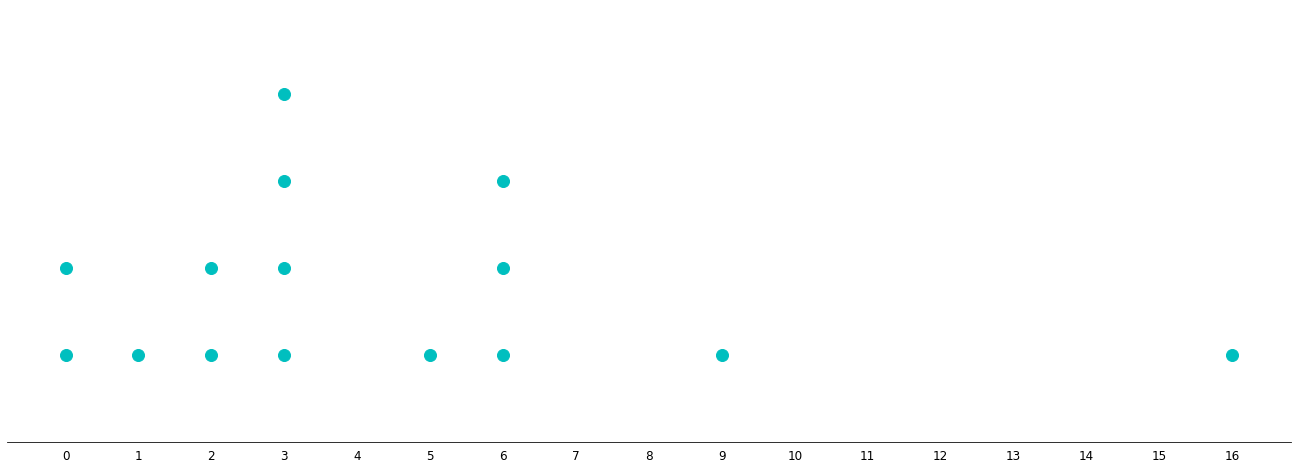

In [25]:
DPR = res['Deaths / 100 Recovered']
res1 = DPR.astype(int)
for x, y in zip(x, res1):
  print('\033[1m'"                                                  ",x," =  ",y, "    (Death /100 Recovered) "'\033[0m')
dotplots(res1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


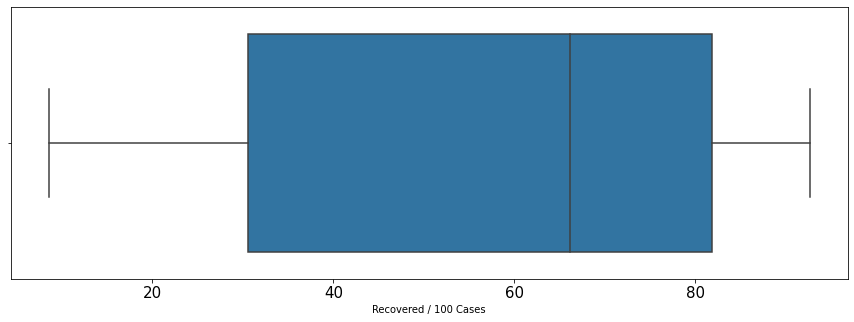

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(res['Recovered / 100 Cases'])

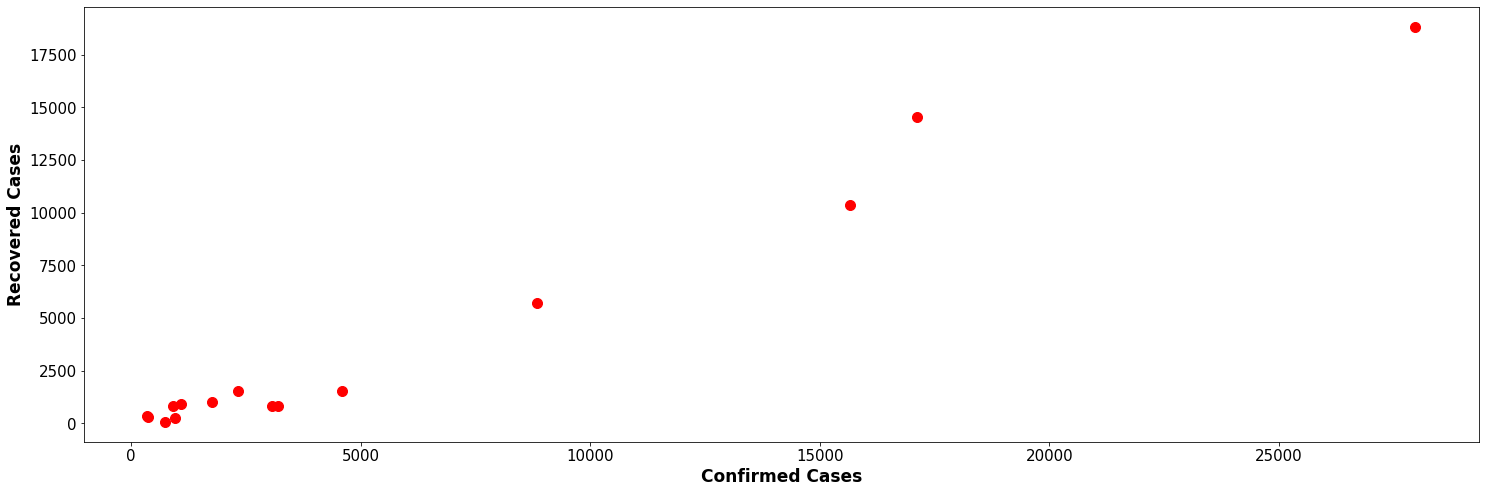

In [27]:
fig, ax = plt.subplots(figsize=(25,8))
plt.scatter(res['Confirmed'],res['Recovered'] , s=100 , color='red')
plt.xlabel("Confirmed Cases", fontweight='bold', fontsize=17)
plt.ylabel("Recovered Cases", fontweight='bold', fontsize=17)
plt.show()

#                   **HYPOTHETICAL TESTING**

#   **(1) ONE SAMPLE T-TEST ON CONFIRMED CASES OF AFRICAN COUNTRIES**

In [106]:
df=pd.read_csv(path , nrows=100)
res= df[df['WHO Region'] == 'Africa']
confirmed=res['Confirmed']
sample_size=10
confirmed_sample=np.random.choice(confirmed,sample_size)
ttest,p_value=ttest_1samp(confirmed_sample,np.mean(confirmed))
if p_value < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


# **(2) ONE SAMPLE Z-TEST ON CONFIRMED CASES OF AFRICAN COUNTRIES**

In [110]:
df=pd.read_csv(path , nrows=186)
res= df[df['WHO Region'] == 'Africa']
confirmed=res['Confirmed']
sample_size=35
confirmed_sample=np.random.choice(confirmed,sample_size)
mean=np.mean(confirmed)
ztest , pvalue=stests.ztest(confirmed_sample,value=mean)
if pvalue < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are rejecting null hypothesis


# **(3) ONE SAMPLE F-TEST ON CONFIRMED CASES OF AFRICAN COUNTRIES**

In [113]:
import scipy
x=res['Deaths']
y=res['New deaths']
f = np.var(x, ddof=1)/np.var(y, ddof=1)
dfn = x.size-1
dfd = y.size-1.2
p = 1-scipy.stats.f.cdf(f, dfn, dfd)
if pvalue < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are rejecting null hypothesis


# **(4)LINEAR REGRESSION B/W CONFIRMED AND RECOVERED CASES**

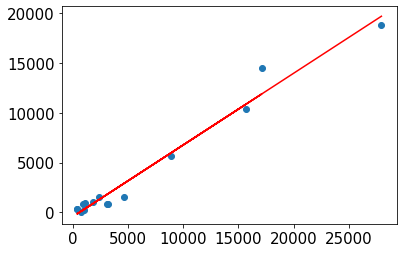

In [114]:
df=pd.read_csv(path , nrows=55)
res= df[df['WHO Region'] == 'Africa']
x=res['Confirmed']
y=res['Recovered']
linreg = LinearRegression()
x = x.values.reshape(-1, 1)
linreg.fit(x, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
y_pred = linreg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

# **CORRELATION**

In [115]:
res.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.888397,0.986617,0.902432,0.865479,0.812984,0.817832,0.032700,0.197577,-0.132545,0.997997,0.911403,-0.054489
Deaths,0.888397,1.000000,0.868297,0.795423,0.920082,0.865310,0.906891,0.243969,0.185568,0.055728,0.864674,0.952427,0.048133
Recovered,0.986617,0.868297,1.000000,0.820811,0.876085,0.822858,0.754782,0.060645,0.291400,-0.154165,0.988593,0.873495,-0.058755
Active,0.902432,0.795423,0.820811,1.000000,0.701914,0.659439,0.852422,-0.074570,-0.079350,-0.080599,0.893049,0.871753,-0.048779
New cases,0.865479,0.920082,0.876085,0.701914,1.000000,0.909683,0.753783,0.128209,0.140927,0.004068,0.849959,0.878478,0.125525
New deaths,0.812984,0.865310,0.822858,0.659439,0.909683,1.000000,0.708659,0.128469,0.081225,0.061161,0.807131,0.768434,0.097741
New recovered,0.817832,0.906891,0.754782,0.852422,0.753783,0.708659,1.000000,0.114366,0.109153,-0.022296,0.784462,0.951778,0.125228
Deaths / 100 Cases,0.032700,0.243969,0.060645,-0.074570,0.128209,0.128469,0.114366,1.000000,0.342374,0.648238,0.018699,0.120449,-0.228209
Recovered / 100 Cases,0.197577,0.185568,0.291400,-0.079350,0.140927,0.081225,0.109153,0.342374,1.000000,-0.336615,0.205020,0.129084,-0.492204
Deaths / 100 Recovered,-0.132545,0.055728,-0.154165,-0.080599,0.004068,0.061161,-0.022296,0.648238,-0.336615,1.000000,-0.149637,-0.007899,0.180877


In [28]:
 tim.initializeTurtle(initial_speed=5)
 string1 = 'DATA  '
 string2 = 'ANALYSIS  '
 string3 = 'ON  '
 string4 = 'AMERICAN  '
 string5 = 'COUNTRIES'
 tim.clear()
 tim.hideturtle()
 tim.penup()
 tim.bgcolor('yellow')
 tim.color('purple')
 tim.setposition(125,150)
 tim.write(string1 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(320,150)
 time.sleep(0.1)
 tim.write(string2 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(650,150)
 time.sleep(0.1)
 tim.write(string3 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(250,250)
 time.sleep(0.1)
 tim.write(string4 , font=(60 , 'Calibiri' , 'bold'))
 tim.setposition(250,350)
 time.sleep(0.1)
 tim.write(string5 , font=(60 , 'Calibiri' , 'bold'))
 tim.color('black')
 tim.pensize(4)
 tim.setposition(80,390)
 tim.pendown()
 tim.forward(320)
 tim.showturtle()
 tim.right(90)
 time.sleep(0.1)
 tim.forward(680)
 tim.right(90)
 time.sleep(0.1)
 tim.forward(320)
 time.sleep(0.1)
 tim.right(90)
 tim.forward(680)
 tim.hideturtle()

In [29]:
df=pd.read_csv(path , nrows=53)
res= df[df['WHO Region'] == 'Americas']
x=res['Country/Region']
y=res['Confirmed']
res.loc[5, 'Country/Region'] = 'Barbuda'
res.loc[50, 'Country/Region'] = 'DominicanRep'
res.loc[32, 'Deaths / 100 Recovered'] = 80.4
res

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
5,Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
11,Bahamas,382,11,91,280,40,0,0,2.88,23.82,12.09,174,208,119.54,Americas
14,Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas
17,Belize,48,2,26,20,0,0,0,4.17,54.17,7.69,40,8,20.00,Americas
20,Bolivia,71181,2647,21478,47056,1752,64,309,3.72,30.17,12.32,60991,10190,16.71,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,80.40,112925,3533,3.13,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas


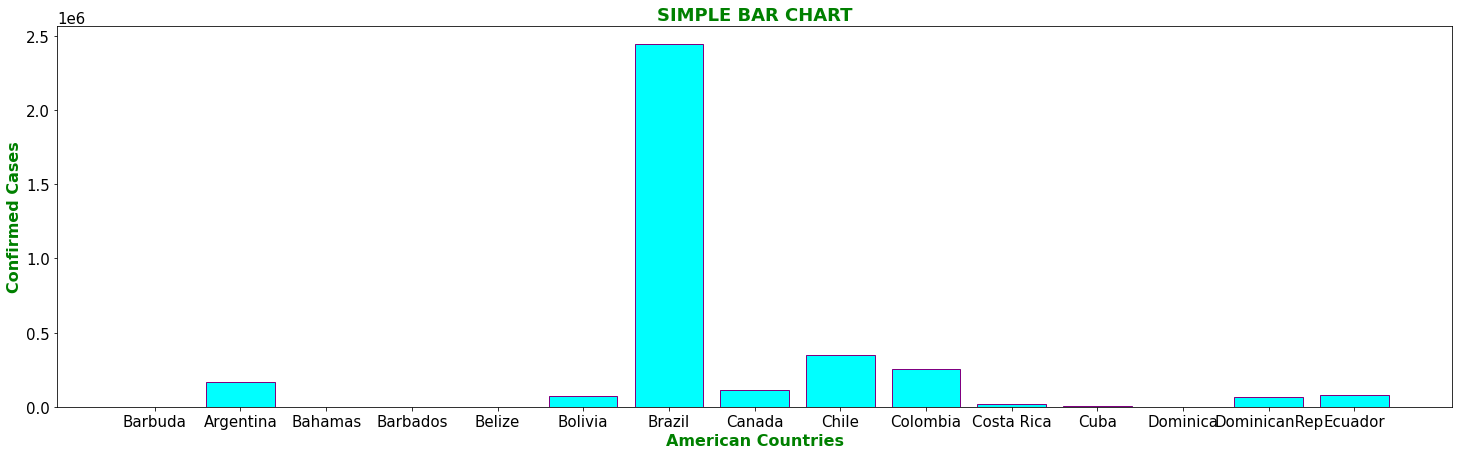

In [30]:
plt.figure(figsize=(25,7))
plt.rc('xtick', labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.bar(x,y,width=[0.8],color=['cyan'],edgecolor='purple')
plt.xlabel("American Countries" , fontweight='bold' ,fontsize=16 , color='green')
plt.ylabel("Confirmed Cases" , fontweight='bold' , fontsize=16 , color='green')
plt.title("SIMPLE BAR CHART" , fontsize=18, color='green' , fontweight='bold')
plt.show()

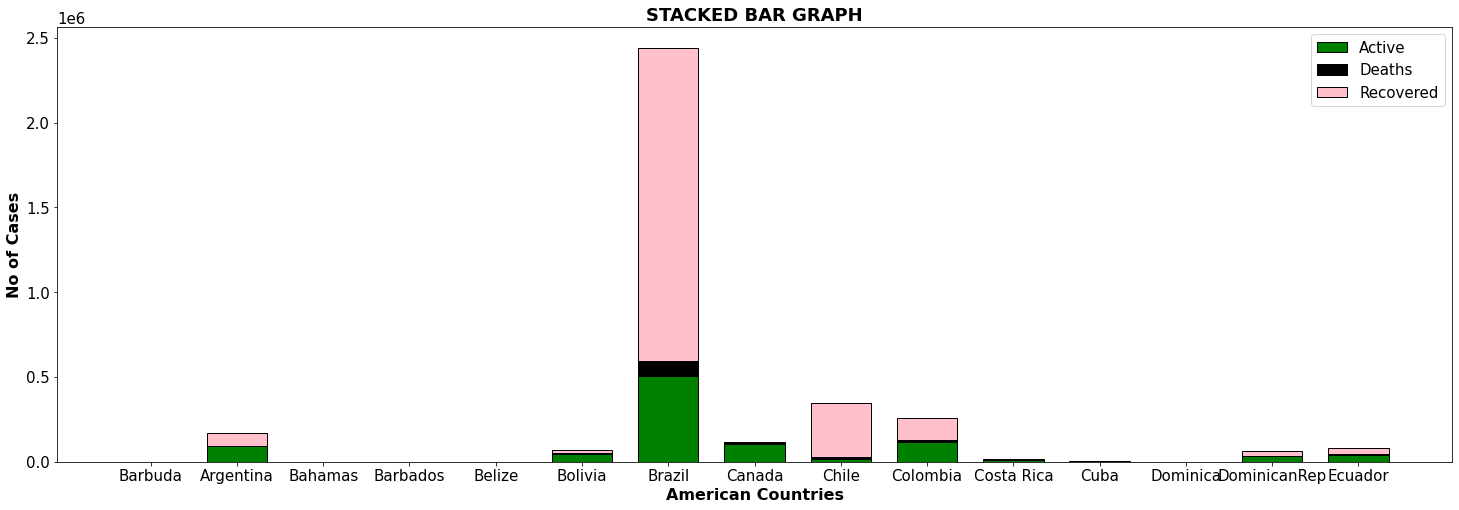

In [31]:
Active = res['Active']
Death = res['Deaths']
Recovered = res['Recovered']
R_recovered = list(np.add(Active,Death))
plt.figure(figsize=(25,8))
plt.rc('xtick' , labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.bar(x,Active,width=0.7,label="Active" , edgecolor='black' , color='green')
plt.bar(x,Death,width=0.7,bottom=Active,label="Deaths" , edgecolor='black' , color='black')
plt.bar(x,Recovered,width=0.7,bottom=R_recovered,label="Recovered" , edgecolor='black' , color='pink')
plt.xlabel("American Countries" , fontweight='bold' , fontsize=16)
plt.ylabel("No of Cases" , fontweight='bold' , fontsize=16)
plt.title("STACKED BAR GRAPH" , fontweight='bold' , fontsize=18)
plt.legend(fontsize=15)
plt.show()


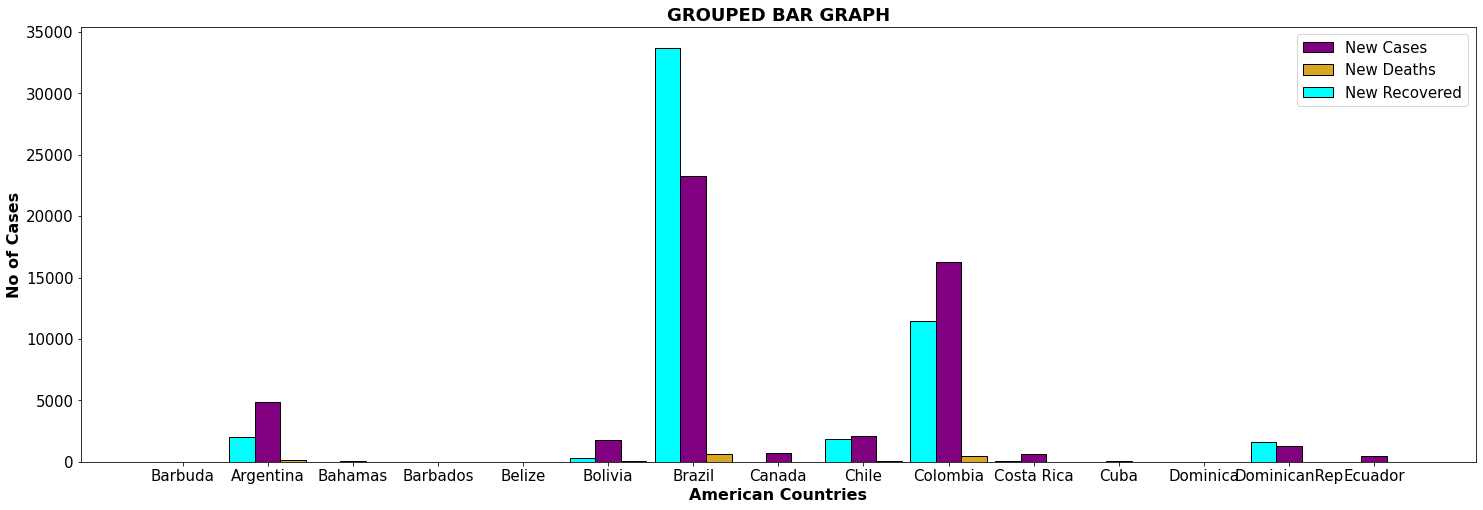

In [32]:
w=0.3
Ncases = res['New cases']
Ndeaths = res['New deaths']
Nrecovered = res['New recovered']
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i-w for i in bar1]
plt.figure(figsize=(25,8))
plt.rc('xtick' , labelsize=15)
plt.rc('ytick' , labelsize=15)
plt.xticks(bar1,x)
plt.bar(bar1,Ncases,0.3,label="New Cases" , edgecolor='black' , color='purple')
plt.bar(bar2,Ndeaths,0.3,label="New Deaths" , edgecolor='black' , color='goldenrod')
plt.bar(bar3,Nrecovered,0.3,label="New Recovered" , edgecolor='black' , color='cyan')
plt.xlabel("American Countries" , fontweight='bold' , fontsize=16)
plt.ylabel("No of Cases" , fontweight='bold' , fontsize=16)
plt.title("GROUPED BAR GRAPH" , fontweight='bold' , fontsize=18)
plt.legend(fontsize=15)
plt.show()

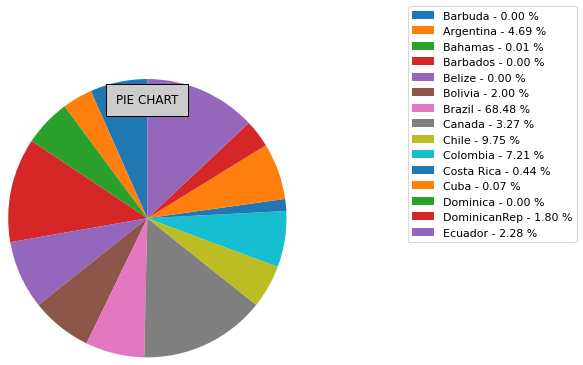

In [33]:
DeathPerCase = res['Deaths / 100 Cases']
porcent = 100.*y/y.sum()
patches, texts = plt.pie(DeathPerCase, startangle=90, radius=1.6 )
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = False
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, DeathPerCase), key=lambda x: x[2], reverse=True))
plt.legend(patches, labels ,bbox_to_anchor=(2.5,1.5), fontsize=11)
plt.savefig('piechart.png', bbox_inches='tight')   
plt.title("PIE CHART" , bbox={'facecolor':'0.8' , 'pad':10} ,)
plt.show()

                                                   Barbuda  =   4     (Death /100 Recovered) 
                                                   Argentina  =   4     (Death /100 Recovered) 
                                                   Bahamas  =   12     (Death /100 Recovered) 
                                                   Barbados  =   7     (Death /100 Recovered) 
                                                   Belize  =   7     (Death /100 Recovered) 
                                                   Bolivia  =   12     (Death /100 Recovered) 
                                                   Brazil  =   4     (Death /100 Recovered) 
                                                   Canada  =   80     (Death /100 Recovered) 
                                                   Chile  =   2     (Death /100 Recovered) 
                                                   Colombia  =   6     (Death /100 Recovered) 
                                                   Costa R

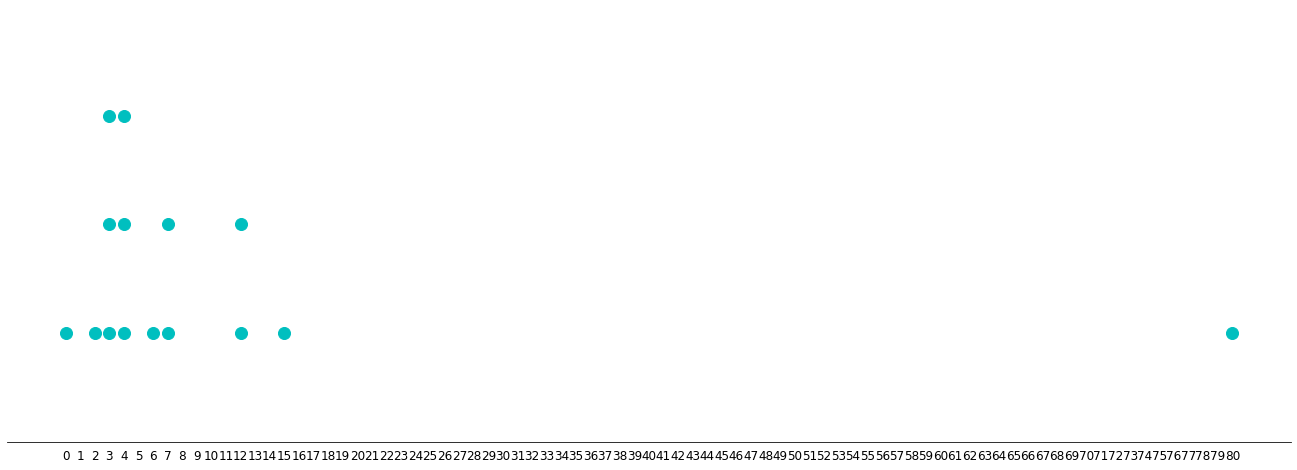

In [34]:
def dotplots(x):
 data = np.array(x)
 values, counts = np.unique(data, return_counts=True)

# Draw dot plot with appropriate figure size, marker size and y-axis limits
 fig, ax = plt.subplots(figsize=(23,8))
 for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'co', ms=12, linestyle='')
 for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
 ax.yaxis.set_visible(False)
 ax.set_ylim(-1, max(counts))
 ax.set_xticks(range(min(values), max(values)+1))
 ax.tick_params(axis='x', length=0, pad=8, labelsize=12)
 return plt.show()
DPR = res['Deaths / 100 Recovered']
res1 = DPR.astype(int)
for x, y in zip(x, res1):
  print('\033[1m'"                                                  ",x," =  ",y, "    (Death /100 Recovered) "'\033[0m')
dotplots(res1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


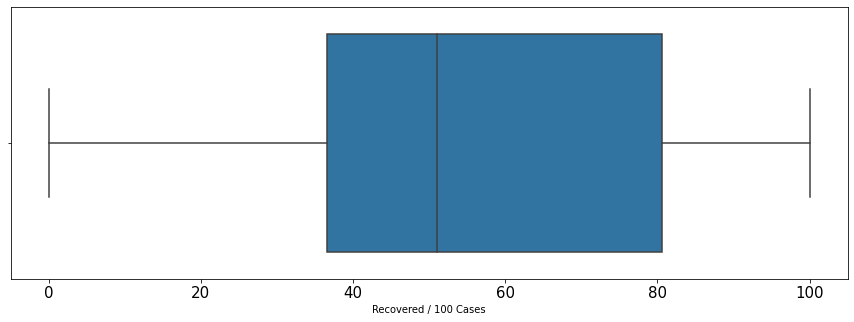

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(res['Recovered / 100 Cases'])

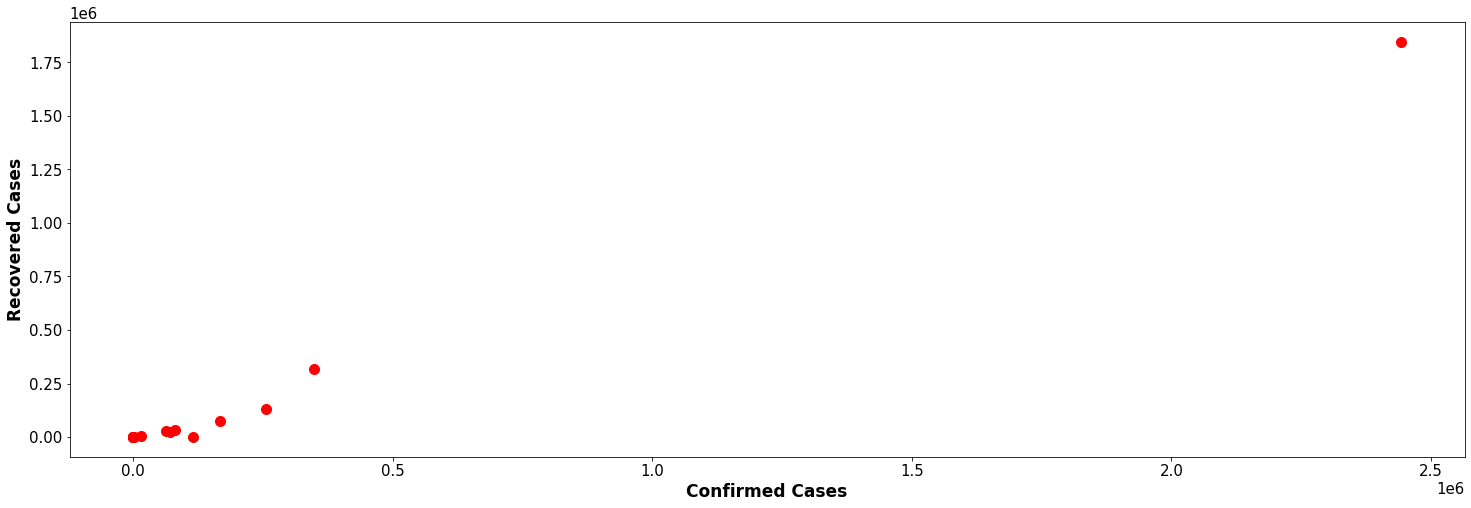

In [36]:
fig, ax = plt.subplots(figsize=(25,8))
plt.scatter(res['Confirmed'],res['Recovered'] , s=100 , color='red')
plt.xlabel("Confirmed Cases", fontweight='bold', fontsize=17)
plt.ylabel("Recovered Cases", fontweight='bold', fontsize=17)
plt.show()

#                   **HYPOTHETICAL TESTING**

#   **(1) ONE SAMPLE T-TEST ON CONFIRMED CASES OF AMERICAN COUNTRIES**

In [117]:
df=pd.read_csv(path , nrows=100)
res= df[df['WHO Region'] == 'Americas']
confirmed=res['Confirmed']
sample_size=10
confirmed_sample=np.random.choice(confirmed,sample_size)
ttest,p_value=ttest_1samp(confirmed_sample,np.mean(confirmed))
if p_value < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


# **(2) ONE SAMPLE Z-TEST ON CONFIRMED CASES OF AMERICAN COUNTRIES**

In [118]:
df=pd.read_csv(path , nrows=186)
res= df[df['WHO Region'] == 'Americas']
confirmed=res['Confirmed']
sample_size=35
confirmed_sample=np.random.choice(confirmed,sample_size)
mean=np.mean(confirmed)
ztest , pvalue=stests.ztest(confirmed_sample,value=mean)
if pvalue < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


# **(3) ONE SAMPLE F-TEST ON CONFIRMED CASES OF AMERICAN COUNTRIES**

In [119]:
import scipy
x=res['Deaths']
y=res['New deaths']
f = np.var(x, ddof=1)/np.var(y, ddof=1)
dfn = x.size-1
dfd = y.size-1.2
p = 1-scipy.stats.f.cdf(f, dfn, dfd)
if pvalue < 0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


# **(4)LINEAR REGRESSION B/W CONFIRMED AND RECOVERED CASES**

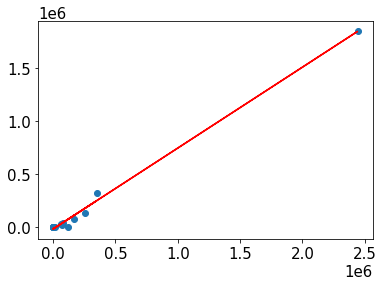

In [120]:
df=pd.read_csv(path , nrows=53)
res= df[df['WHO Region'] == 'Americas']
x=res['Confirmed']
y=res['Recovered']
linreg = LinearRegression()
x = x.values.reshape(-1, 1)
linreg.fit(x, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
y_pred = linreg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

# **CORRELATION**

In [121]:
res.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.996304,0.997410,0.966709,0.848936,0.802659,0.964823,0.013010,0.181572,-0.121233,0.999789,0.990995,-0.084460
Deaths,0.996304,1.000000,0.990495,0.973691,0.838909,0.792108,0.959658,0.072977,0.143245,-0.084659,0.996214,0.986552,-0.094547
Recovered,0.997410,0.990495,1.000000,0.945825,0.828092,0.781512,0.954726,-0.012570,0.227942,-0.137287,0.997987,0.983300,-0.081821
Active,0.966709,0.973691,0.945825,1.000000,0.890112,0.847044,0.960794,0.095789,0.010522,-0.065217,0.963604,0.976912,-0.088722
New cases,0.848936,0.838909,0.828092,0.890112,1.000000,0.995044,0.948726,-0.040580,0.095778,-0.098695,0.841662,0.887530,-0.028130
New deaths,0.802659,0.792108,0.781512,0.847044,0.995044,1.000000,0.919073,-0.034651,0.097063,-0.077110,0.795211,0.842869,-0.028422
New recovered,0.964823,0.959658,0.954726,0.960794,0.948726,0.919073,1.000000,-0.022263,0.168365,-0.122128,0.960656,0.981967,-0.045971
Deaths / 100 Cases,0.013010,0.072977,-0.012570,0.095789,-0.040580,-0.034651,-0.022263,1.000000,-0.267083,0.715014,0.017459,-0.016124,-0.219653
Recovered / 100 Cases,0.181572,0.143245,0.227942,0.010522,0.095778,0.097063,0.168365,-0.267083,1.000000,-0.556752,0.184978,0.157490,-0.445581
Deaths / 100 Recovered,-0.121233,-0.084659,-0.137287,-0.065217,-0.098695,-0.077110,-0.122128,0.715014,-0.556752,1.000000,-0.122297,-0.113107,0.352929
